In [ ]:
# 데이터 분할을 위한 pylabel 패키지 설치 
!pip install pylabel 

In [1]:
import glob
import pandas as pd
import os
import tqdm
import logging
logging.getLogger().setLevel(logging.CRITICAL)
from pylabel import importer
import torch
# from IPython.display import Imag
import cv2

In [50]:
df = pd.read_csv("day_data tmp.csv", index_col=0)
df.head()

,label,img_name,cx,cy,img_w,img_h,json_path,img_path,folder_path
0,1,day_00032.jpg,0.791927,0.568981,0.030729,0.043519,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...
1,1,day_00033.jpg,0.800000,0.568981,0.032292,0.045370,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...
2,1,day_00034.jpg,0.813802,0.568981,0.033854,0.047222,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...
3,1,day_00035.jpg,0.845313,0.569907,0.035417,0.049074,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...
4,0,day_00035.jpg,0.926562,0.799074,0.146875,0.401852,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...,J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...


In [55]:
# json 데이터 이름 수정
tmp = df['json_path'][0].replace("라벨링데이터", "원천데이터")
tmp.replace(".png.json", ".jpg.txt")

'J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/원천데이터/주간\\주간_성남01\\day_00032.jpg.txt'

In [48]:
print(df['label_path'][9681])

J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/원천데이터/labels\day_00035.jpg.txt


In [5]:
import os
print(os.path.exists(img_dir))
print(os.getcwd())

True
j:\zero_base_school\final


In [ ]:
importer.ImportImagesOnly(path = path_to_annotations)

In [47]:
dataset = importer.ImportYoloV5(path = path_to_annotations, img_ext="")

In [67]:
dataset.df

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,day_00032.jpg.,,1,1920,1080,3,,1491.0,591.0,...,,,,,,1,,,,1
1,,day_00033.jpg.,,3,1920,1080,3,,1505.0,590.0,...,,,,,,1,,,,1
2,,day_00034.jpg.,,5,1920,1080,3,,1530.0,589.0,...,,,,,,1,,,,1
3,,day_00035.jpg.,,7,1920,1080,3,,1589.0,589.0,...,,,,,,1,,,,1
4,,day_00035.jpg.,,7,1920,1080,3,,1638.0,646.0,...,,,,,,0,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,,night_19505.jpg.,,12819,1920,1080,3,,974.0,839.0,...,,,,,,0,,,,1
9678,,night_19506.jpg.,,12821,1920,1080,3,,1059.0,840.0,...,,,,,,0,,,,1
9679,,night_19506.jpg.,,12821,1920,1080,3,,832.0,869.0,...,,,,,,0,,,,1


In [69]:
def name(id):
    if id == 0:
        return "motor_bike"
    elif id == 1 :
        return "bike"
    elif id == 2 :
        return "etc"

In [ ]:
# 라벨 이름 수정
for i in range(len(dataset.df)):
    if dataset.df['cat_id'][i] == '0':
        dataset.df['cat_name'][i] = "motor_cycle"
    elif dataset.df['cat_id'][i] == '1': 
        dataset.df['cat_name'][i] = "bike"
    elif dataset.df['cat_id'][i] == '2':
        dataset.df['cat_name'][i] = "etc_scooter"        

In [89]:
dataset.df

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
0,,day_06659.jpg.,,2725,1920,1080,3,,1513.0,907.0,...,,,,,,0,motor_cycle,,train,1
1,,day_11782.jpg.,,4715,1920,1080,3,,496.0,638.0,...,,,,,,0,motor_cycle,,train,1
2,,day_05120.jpg.,,1975,1920,1080,3,,1281.0,863.0,...,,,,,,0,motor_cycle,,train,1
3,,day_05120.jpg.,,1975,1920,1080,3,,494.0,883.0,...,,,,,,2,etc,,train,1
4,,day_06634.jpg.,,2679,1920,1080,3,,1374.0,867.0,...,,,,,,1,bike,,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,,day_04994.jpg.,,1863,1920,1080,3,,967.0,597.0,...,,,,,,0,motor_cycle,,val,1
9678,,night_17295.jpg.,,11295,1920,1080,3,,1715.0,617.0,...,,,,,,0,motor_cycle,,val,1
9679,,day_15081.jpg.,,6539,1920,1080,3,,1388.0,580.0,...,,,,,,1,bike,,val,1
9680,,night_06913.jpg.,,9707,1920,1080,3,,687.0,648.0,...,,,,,,0,motor_cycle,,val,1


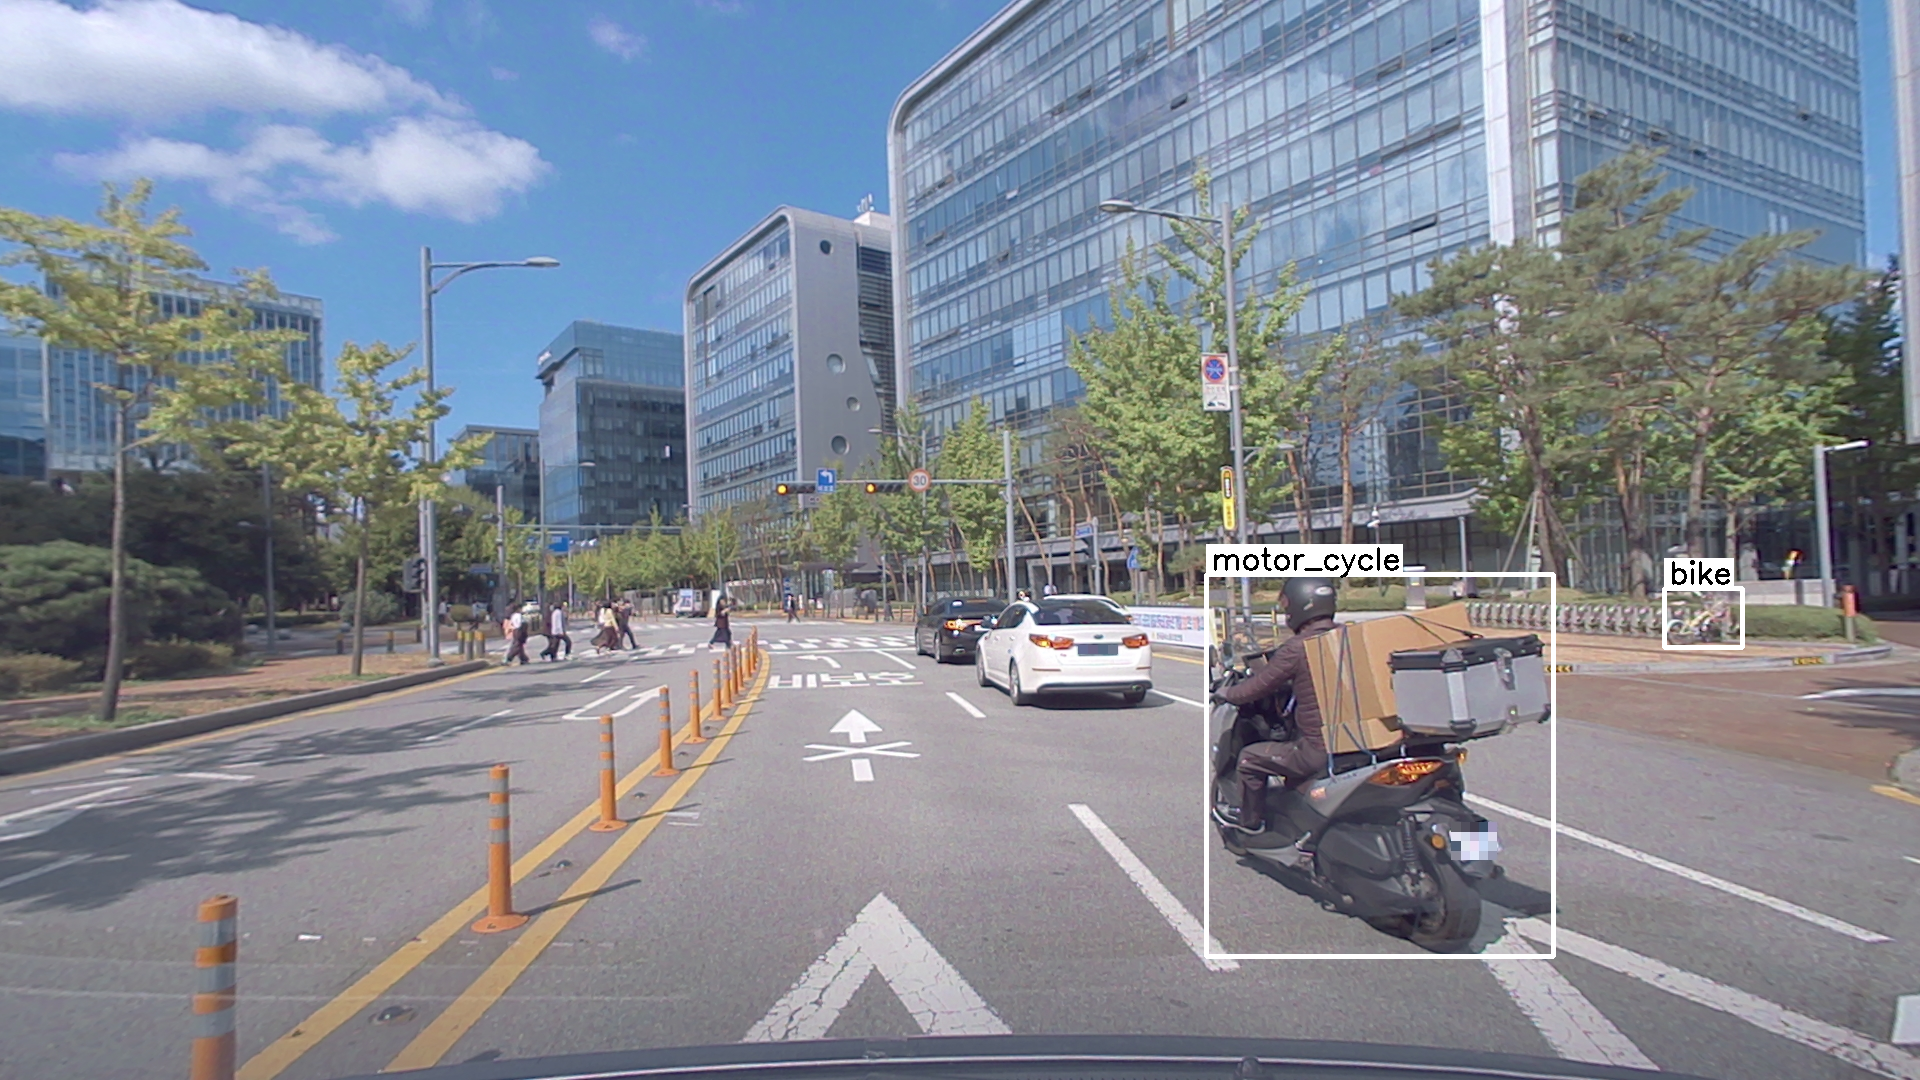

In [94]:
# 이미지 + 바운딩박스 라벨링 확인
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(11))


In [81]:
# 데이터셋 분할 및 비율 확인
dataset.splitter.StratifiedGroupShuffleSplit(train_pct=.8, val_pct=.1, test_pct=.1, batch_size=32)
dataset.analyze.ShowClassSplits()

,all,train,test,val
cat_name,,,,
motor_bike,0.526234,0.525760,0.528926,0.527936
etc,0.275460,0.275949,0.272727,0.273660
bike,0.198306,0.198291,0.198347,0.198404


In [ ]:
# 분할
dataset.export.ExportToYoloV5(output_path='model_training/labels',yaml_file='dataset.yaml', copy_images=True, use_splits=True)